In [450]:
import numpy as np
import pandas as pd

In [451]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [452]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [453]:
df.shape

(5572, 5)

In [454]:
# 1. Data cleaning because there are NaN values
# 2. EDA(Exploratory Data Analysis)
# 3. Text Preprocessing (Vectorization, Stemming, Removing Stopwords, etc.)
# 4. Model Building
# 5. Model Evaluation
# 6. Improvements depending on the results/evaluation

### 1. Data cleaning

In [455]:
# 1. Data cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [456]:
# Drop Last 3 Columns

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [457]:
df.sample(5)

,v1,v2
455,ham,Si si. I think ill go make those oreo truffles.
4292,ham,You best watch what you say cause I get drunk ...
904,ham,"We're all getting worried over here, derek and..."
1856,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
1614,ham,Me sef dey laugh you. Meanwhile how's my darli...


In [458]:
# Renaming the columns

df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [459]:
df.sample(5)

,target,text
2869,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...
855,spam,Talk sexy!! Make new friends or fall in love i...
4423,ham,Update your face book status frequently :)
3551,ham,Lol u still feeling sick?
1212,ham,"Yo, the game almost over? Want to go to walmar..."


In [460]:
# we change the target column's name into 0 and 1

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [461]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [462]:
# Check missing value

df.isnull().sum()

target    0
text      0
dtype: int64

In [463]:
# Check for duplicates

df.duplicated().sum()

np.int64(403)

In [464]:
# Remove duplicates

df.drop_duplicates(inplace=True)

In [465]:
df.duplicated().sum()

np.int64(0)

In [466]:
df.shape

(5169, 2)

### 2. EDA (Exploratory Data Analysis)

In [467]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [468]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

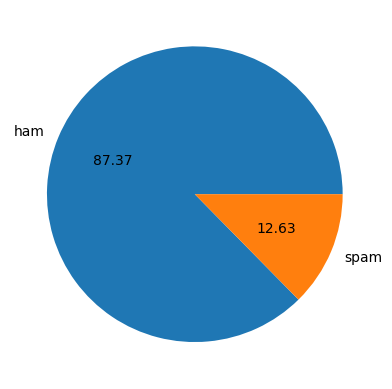

In [469]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [470]:
# Data is Imbalanced because there are more ham emails than spam emails

In [471]:
# For deeper analysis I create 3 columns
# 1. Number of characters
# 2. Number of words
# 3. Number of sentences

In [472]:
import nltk

nltk.download('punkt')

nltk.download('punkt_tab')

nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Priyam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [473]:
# 1. Number of characters

df['num_characters'] = df['text'].apply(len) # Number of characters used in each email

In [474]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [475]:
# 2. Number of words

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) # Number of words used in each email

In [476]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [477]:
# 3. Number of sentences

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # Number of sentences used in each email

In [478]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [479]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [480]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe() # Number of ham emails

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [481]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe() # Number of spam emails

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [482]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

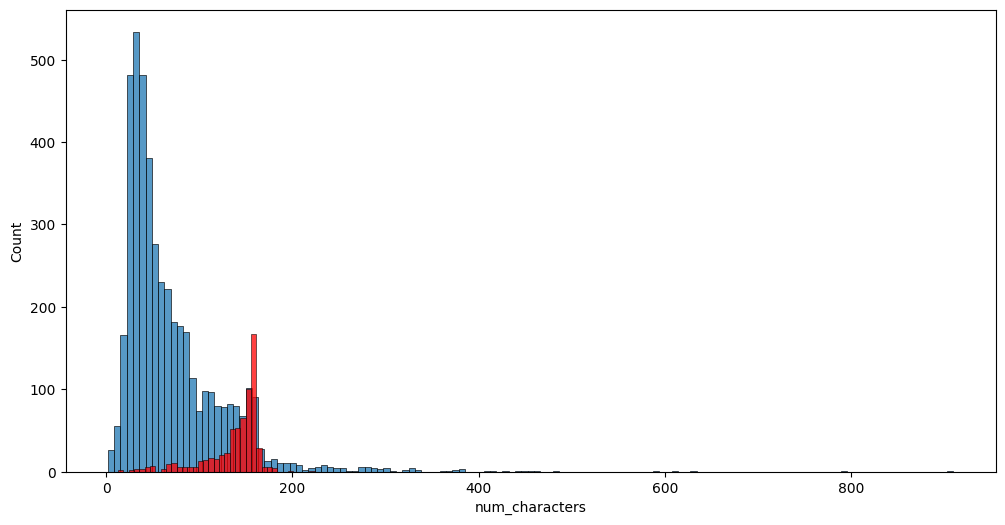

In [483]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

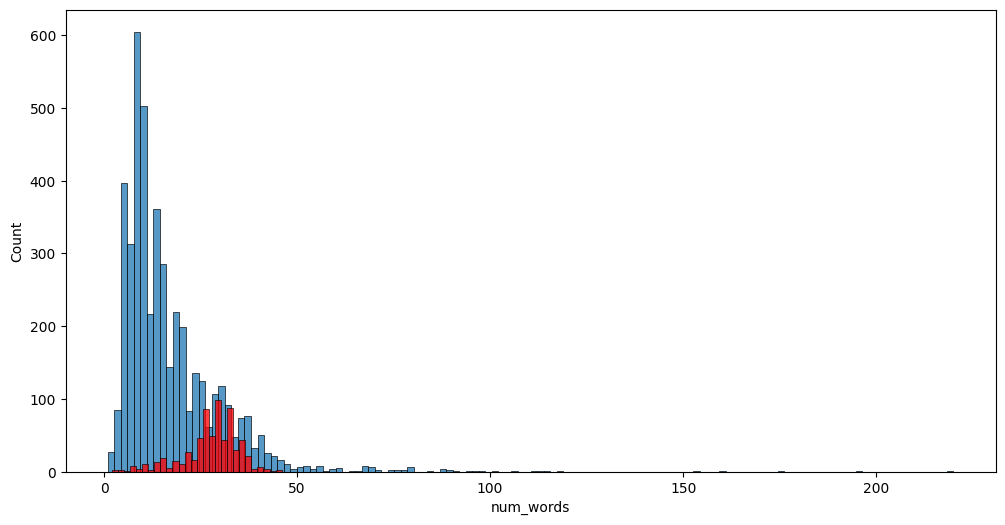

In [484]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

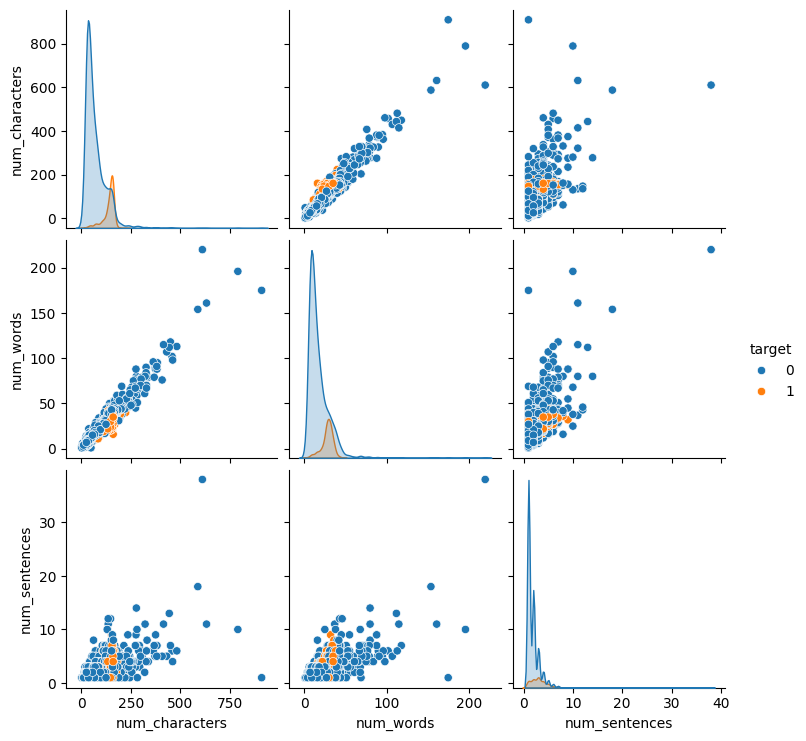

In [485]:
sns.pairplot(df, hue='target')

In [486]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

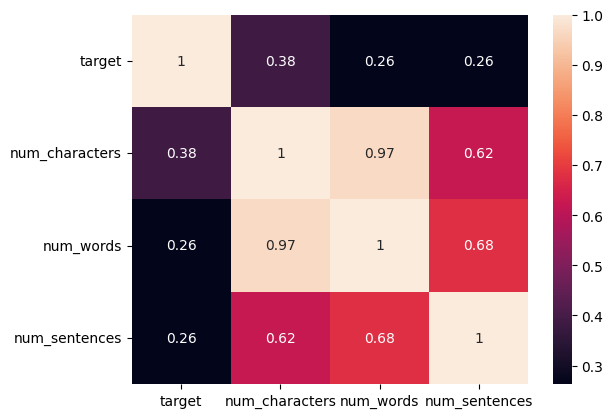

In [487]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

### 3. Text Preprocessing (Vectorization, Stemming, Removing Stopwords, etc.)

In [488]:
# Data Preprocessing
# 1. Lower Case
# 2. Tokenization (Splitting words)
# 3. Removing special characters
# 4. Removing stopwords and punctuation
# 5. Stemming (Reduce words to their root form. Example: 'running' and 'ran' will be treated as 'run')

In [489]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():  # Remove special characters
            y.append(i)
            
    text = y[:] # Copy the list to text
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  # Remove stopwords and punctuation
            y.append(i)
            
    text = y[:] # Copy the list to text
    y.clear()
    
    for i in text: # Stemming
        y.append(ps.stem(i))
    
    
    return " ".join(y) # Join the list to a string

In [490]:
# Example
transform_text("Hi, How are you % eg?, loving Priyam")

'hi eg love priyam'

In [491]:
df['transform_text'] = df['text'].apply(transform_text)

In [492]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [493]:
# Now we make word cloud because it help to show important words in big format

In [494]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [495]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

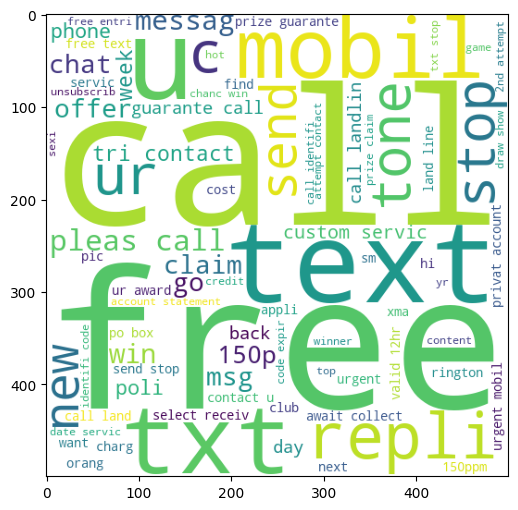

In [496]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [497]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

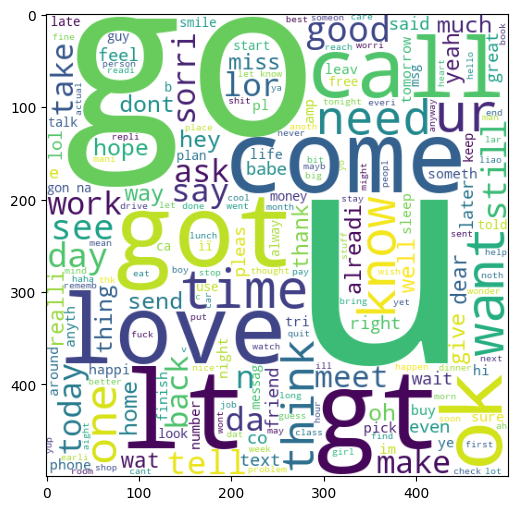

In [498]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [499]:
# Top 30 words in spam emails

spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [500]:
len(spam_corpus) # So, there are almost 10k spam words

9939

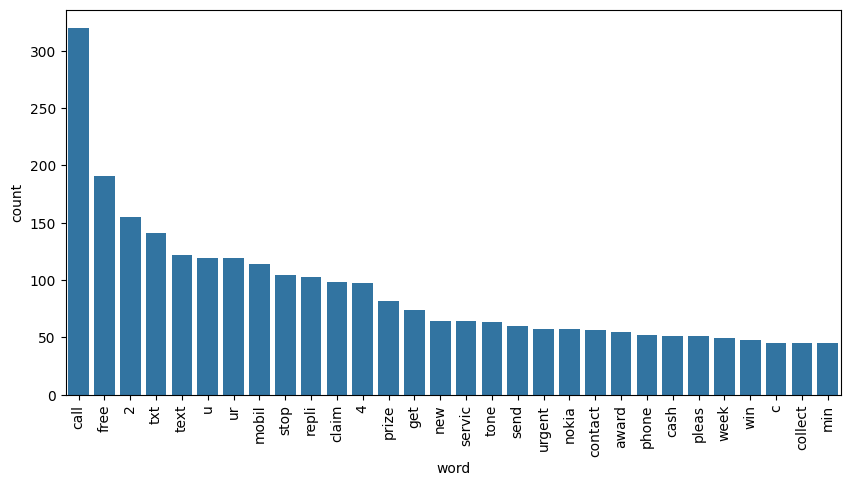

In [501]:
from collections import Counter

# Create DataFrame from the word counts
common_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=common_df)
plt.xticks(rotation='vertical')
plt.show()

In [502]:
# Top 30 words in ham emails

ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [503]:
len(ham_corpus) # So, there are almost 35k ham words

35404

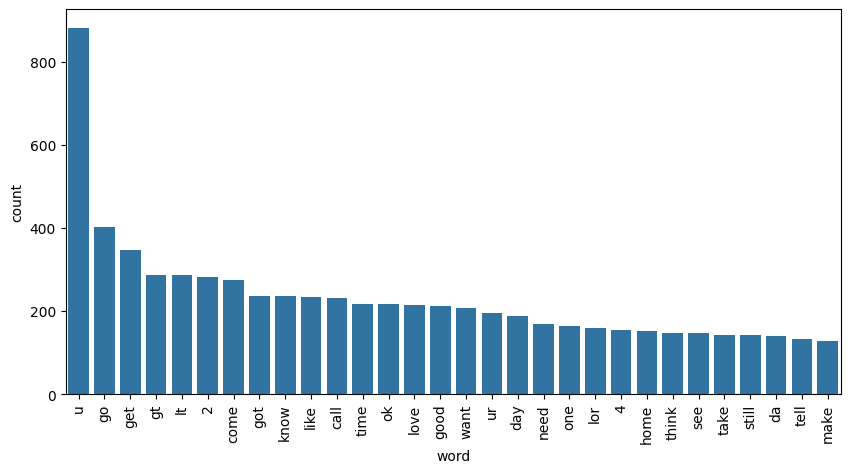

In [504]:
# Create DataFrame from the word counts
common_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=common_df)
plt.xticks(rotation='vertical')
plt.show()

In [505]:
# Convert text into Numbers Or Vectorize
# Text Vectorization
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [506]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transform_text']).toarray()

In [507]:
X.shape

(5169, 3000)

In [508]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

### 4. Model Building

In [509]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [510]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [511]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8626692456479691
[[771 118]
 [ 24 121]]
0.5062761506276151


In [512]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [513]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [514]:
# So, In my opinion MultinomialNB is the best model because it has the highest precision and accuracy.

In [515]:
# tfidf --> MNB

### 5. Model Evaluation

In [516]:
# Here are the models I will be using for training and testing and record all model scores and compare them. Almost every classification algorithm models.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [517]:
# First I create the models into objects
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [518]:
# Then I put all objects into a dictionary
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [519]:
# Now I create a function to train the models
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [520]:
# Example How to use the function
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9477611940298507)

In [521]:
# Then I put all models into a loop on dictionary and store the accuracy and precision scores.
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9477611940298507
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8135593220338984
For  LR
Accuracy -  0.9468085106382979
Precision -  0.8629032258064516
For  RF
Accuracy -  0.971953578336557
Precision -  0.9915254237288136
For  AdaBoost
Accuracy -  0.913926499032882
Precision -  0.7916666666666666
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8768115942028986
For  ETC
Accuracy -  0.9796905222437138
Precision -  1.0
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9514563106796117
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9375


In [522]:
# Then I create a DataFrame to store the scores
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [523]:
performance_df # So, ETC (ExtraTreesClassifier) is the best model because it has the highest precision and accuracy.

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
8,ETC,0.979691,1.000000
2,NB,0.972921,0.991597
5,RF,0.971954,0.991525
9,GBDT,0.949710,0.951456
0,SVC,0.975822,0.947761
10,xgb,0.968085,0.937500
7,BgC,0.960348,0.876812
4,LR,0.946809,0.862903
3,DT,0.931335,0.813559


In [524]:
# Here I create a new DataFrame to store the scores
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [525]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,ETC,Accuracy,0.979691
2,NB,Accuracy,0.972921
3,RF,Accuracy,0.971954
4,GBDT,Accuracy,0.949710
5,SVC,Accuracy,0.975822
6,xgb,Accuracy,0.968085
7,BgC,Accuracy,0.960348
8,LR,Accuracy,0.946809
9,DT,Accuracy,0.931335


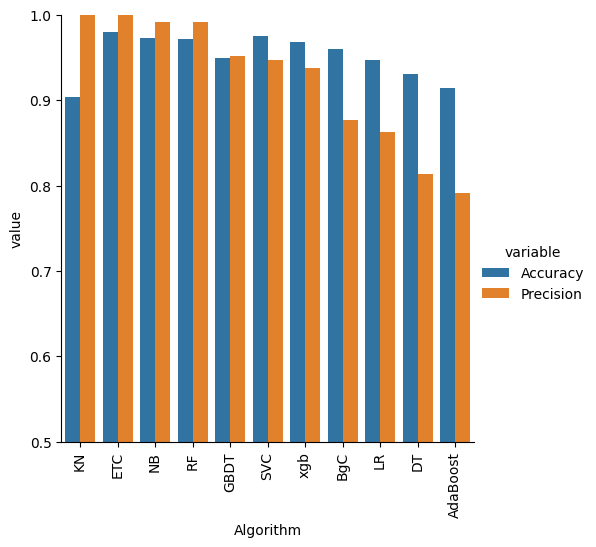

In [526]:
# Graph of Accuracy and Precision
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### 6. Improvements depending on the results/evaluation

In [527]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [528]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [529]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.904255,1.000000,0.904255,1.000000
1,ETC,0.979691,1.000000,0.979691,1.000000
2,NB,0.972921,0.991597,0.972921,0.991597
3,RF,0.971954,0.991525,0.971954,0.991525
4,GBDT,0.949710,0.951456,0.949710,0.951456
5,SVC,0.975822,0.947761,0.975822,0.947761
6,xgb,0.968085,0.937500,0.968085,0.937500
7,BgC,0.960348,0.876812,0.960348,0.876812
8,LR,0.946809,0.862903,0.946809,0.862903
9,DT,0.931335,0.813559,0.931335,0.813559


In [530]:
# Now I use voting classifier to make combination of best performing models to see it outperforms the best performing model.
# Goal is Precision is 100% and Accuracy is +97.1%

In [531]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [532]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [533]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [534]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 1.0


In [ ]:
# Stacking also same as voting but in this case we use stacking to make combination of best performing models and give them weightage to make it outperform the best performing model

In [535]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [536]:
from sklearn.ensemble import StackingClassifier

In [537]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [538]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9568345323741008


In [ ]:
# So, here we see I use multiple models and also use voting classifier & stacking classifier to make combination of best performing models to see it outperforms the best performing model.

# But the best performing model is Voting Classifier with Accuracy = 98.3% & Precision = 100%

In [539]:
# Now we will use pickle to save our model

import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))